[1] 3123

[1] 4414

[1] 20940

[1] 21052

[1] 2831

[1] 3985

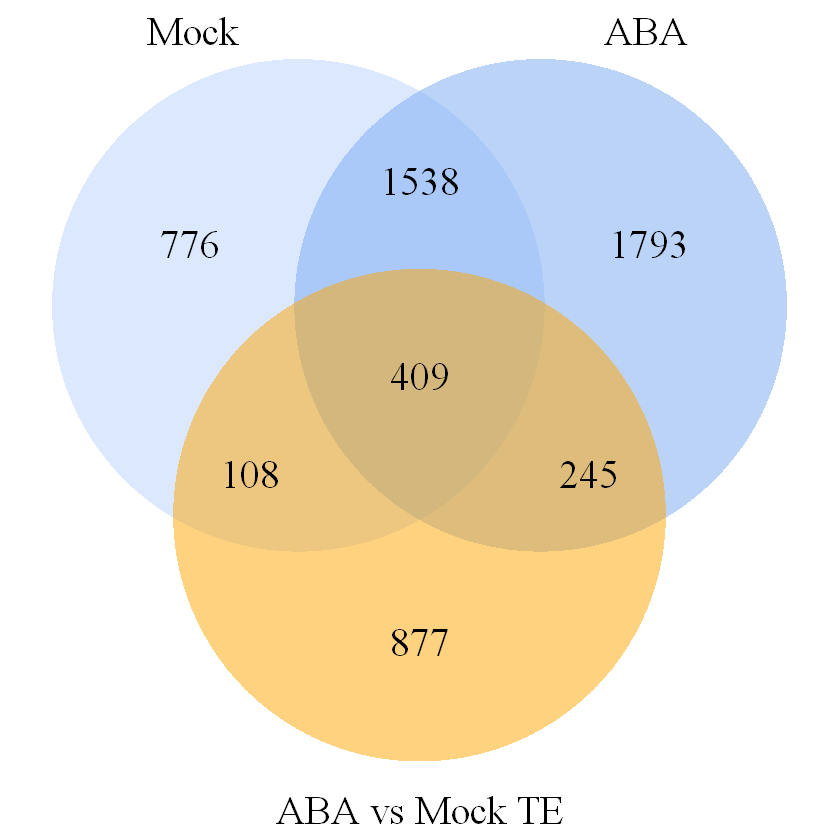

In [60]:
# fig. 6c

library(VennDiagram)

Col0_ABAvsMock = read.csv("data/col0.xtail.aba_vs_mock.txt",header=T,sep="\t",row.names=1)
Col0_ABAvsMock_sig = subset(Col0_ABAvsMock,pvalue.adjust<0.05)

mock_g7g8vsCol0 = read.csv("data/mock.xtail.g7g8_vs_col0.txt",header=T,sep="\t",row.names=1)
aba_g7g8vsCol0 = read.csv("data/aba.xtail.g7g8_vs_col0.txt",header=T,sep="\t",row.names=1)

mock_clip = read.csv("data/CLIP_mock.txt",header=T,sep="\t")
aba_clip = read.csv("data/CLIP_ABA.txt",header=T,sep="\t")

mock_clip = subset(mock_clip, mock_clip$annotation!='Promoter')
aba_clip = subset(aba_clip, aba_clip$annotation!='Promoter')
#head(mock_clip)

#list of binding targets
mock_clip_ID = unique(mock_clip[,1])
mock_other_ID = setdiff(rownames(mock_g7g8vsCol0),mock_clip_ID)

aba_clip_ID = unique(aba_clip[,1])
aba_other_ID = setdiff(rownames(aba_g7g8vsCol0),aba_clip_ID)

length(mock_clip_ID)
#[1] 3123
length(aba_clip_ID)
#[1] 4414


#filter sum of abundance rpkm <=1
rawdata =read.csv("data/rna.ribo.fpkm_rpkm.mean.txt",header=T,sep="\t",row.names=1)
# filter sum of abundance rpkm <=1
rawdata =read.csv("data/rna.ribo.fpkm_rpkm.mean.txt",header=T,sep="\t",row.names=1)
rawdata$mock_sum = rawdata[,1] + rawdata[,3] + rawdata[,5] + rawdata[,7]
rawdata$aba_sum = rawdata[,2] + rawdata[,4] + rawdata[,6] + rawdata[,8]
mock_high_abundance = rownames(subset(rawdata,rawdata$mock_sum>=1))
aba_high_abundance = rownames(subset(rawdata,rawdata$aba_sum>=1))
length(mock_high_abundance)
#[1] 20940
length(aba_high_abundance)
#[1] 21052


mock_clip_ID = intersect(mock_clip_ID,mock_high_abundance)
aba_clip_ID = intersect(aba_clip_ID,aba_high_abundance)

length(mock_clip_ID)
#[1] 2831
length(aba_clip_ID)
#[1] 3985

mock_other_ID = intersect(mock_other_ID,mock_high_abundance)
aba_other_ID = intersect(aba_other_ID,mock_high_abundance)

common12= intersect((mock_clip_ID),aba_clip_ID)
common13= intersect((mock_clip_ID),rownames(Col0_ABAvsMock_sig))
common23= intersect((aba_clip_ID),rownames(Col0_ABAvsMock_sig))
common123 = intersect(common12,common13)

#pdf("CLIP_Mock_ABA_TE_overlap.pdf", width=10/2.54, height=10/2.54) #,family = "Arial",pointsize = 8)#,paper = "a4")
par(mar= c(0,0,0,0)+0.1,mgp = c(1,0.8,0),las=1,lwd=1)
venn.plot <- draw.triple.venn(
  area1 = length(mock_clip_ID),        # Size of Set 1
  area2 = length(aba_clip_ID),        # Size of Set 2
  area3 = nrow(Col0_ABAvsMock_sig),        # Size of Set 3
  n12 = length(common12),     # Overlap between Set 1 and Set 2
  n13 = length(common13),     # Overlap between Set 1 and Set 3
  n23 = length(common23),     # Overlap between Set 2 and Set 3
  n123 = length(common123),   # Overlap among all three sets
  category = c("Mock", "ABA", "ABA vs Mock TE"),
  fill = c("#b6d1fd", "#79a7f1", "orange"),
  lty = "blank",       # No borders around the circles
  cex = 2,             # Font size for counts
  cat.cex = 2,         # Font size for labels
  cat.pos = c(-20, 20, 180),  # Adjust label positions
  cat.dist = c(0.05, 0.05, 0.05),  # Adjust label distance from circles
  scaled = TRUE        # Automatically scale based on set sizes
)
#dev.off()




Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


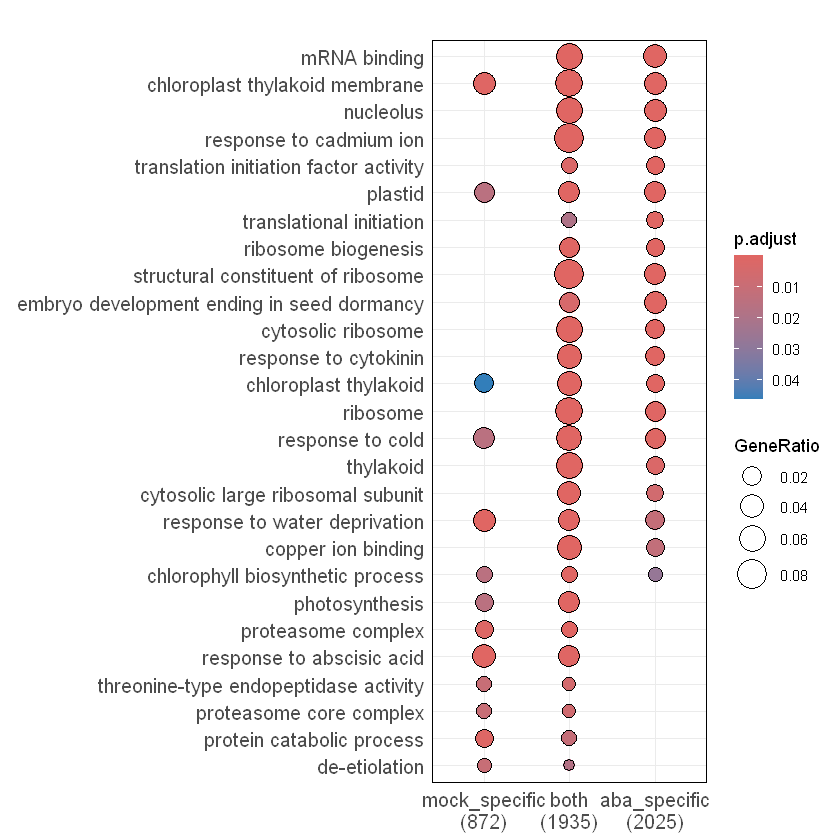

In [61]:
# fig. 6d

library(clusterProfiler)
library(org.At.tair.db)
library(ggplot2)
library(stringr)

mock_specific <- setdiff(mock_clip_ID,aba_clip_ID)
both <- intersect(mock_clip_ID,aba_clip_ID)
aba_specific <- setdiff(aba_clip_ID,mock_clip_ID)

t2n <- fread("data/t2n-zj.txt",header = F,sep = "\t")
t2g <- fread("data/t2g-zj.txt",header = F,sep = "\t")


mock_clip_ID = mock_clip_ID[order(mock_g7g8vsCol0[mock_clip_ID,"log2FC_TE_final"])]
mydf <- data.frame(Entrez = c(mock_specific, both, aba_specific),
                   group = c(rep("mock_specific", length(mock_specific)), rep("both", length(both)), rep("aba_specific", length(aba_specific))))

compare_result <- compareCluster(Entrez ~ group, data = mydf,fun = "enricher",TERM2GENE = t2g,TERM2NAME = t2n,pvalueCutoff = 0.05)
compare_result@compareClusterResult$Cluster <- factor(compare_result@compareClusterResult$Cluster, levels = c("mock_specific", "both","aba_specific"))

#pdf("fig6_Mock_ABA_clip_GO.pdf",width = 8,height = 6)
dotplot(compare_result, showCategory = 12) +
  theme_minimal() +
  theme(panel.border = element_rect(color = "black", fill = NA, linewidth = 0.3), axis.text.y = element_text(size = 12), axis.text.x = element_text(size = 12)) +
  xlab(NULL)+
  scale_y_discrete(labels=function(y) str_wrap(y, width=100))
#dev.off()



	Wilcoxon rank sum test with continuity correction

data:  mock_g7g8vsCol0[mock_clip_ID, "log2FC_TE_final"] and mock_g7g8vsCol0[mock_other_ID, "log2FC_TE_final"]
W = 20381729, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


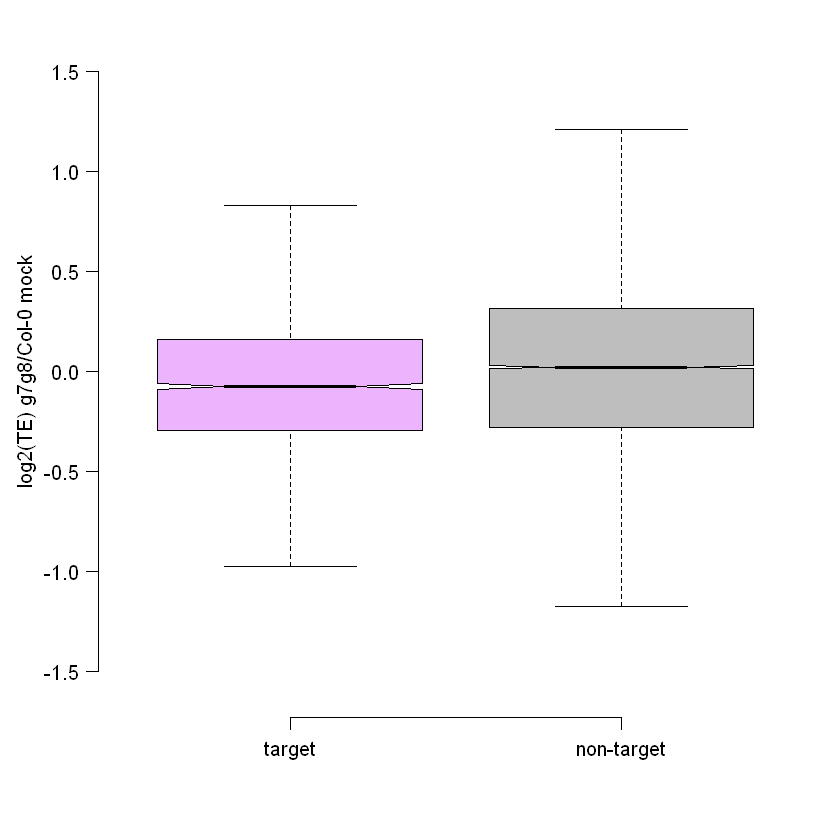

In [62]:
# fig. 6e

#pdf("mock_CLIP_boxplot_TE.pdf", width=6/2.54, height=7/2.54,pointsize = 8)
par(mar = c(5,4,1,1) + 0.1, mgp = c(2.6, 0.8, 0),las=1,lwd=1)
boxplot(mock_g7g8vsCol0[mock_clip_ID,"log2FC_TE_final"],mock_g7g8vsCol0[mock_other_ID,"log2FC_TE_final"],outline =F, ylab = "log2(TE) g7g8/Col-0 mock", notch=TRUE,names=c('target','non-target'),col = c("#ebb4fc","gray"),ylim = c(-1.6,1.6),horizontal=F,frame=F)
#dev.off()

wilcox.test(mock_g7g8vsCol0[mock_clip_ID,"log2FC_TE_final"],mock_g7g8vsCol0[mock_other_ID,"log2FC_TE_final"]) #p-value < 2.2e-16


	Wilcoxon rank sum test with continuity correction

data:  aba_g7g8vsCol0[aba_clip_ID, "log2FC_TE_final"] and aba_g7g8vsCol0[aba_other_ID, "log2FC_TE_final"]
W = 28224801, p-value = 0.03123
alternative hypothesis: true location shift is not equal to 0


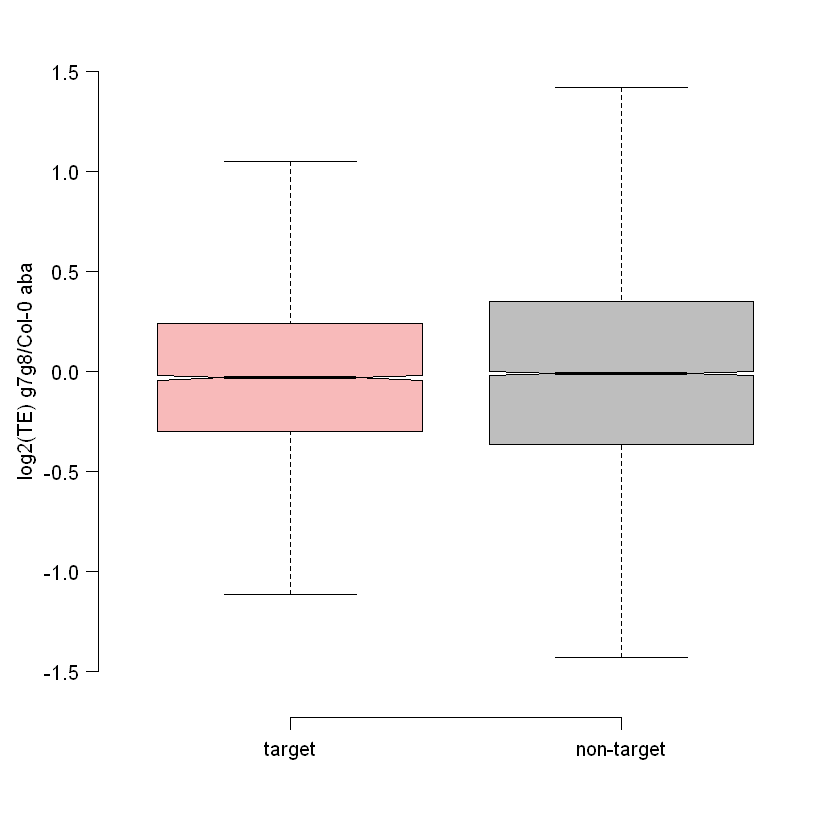

In [63]:
#pdf("aba_CLIP_boxplot_TE.pdf", width=6/2.54, height=7/2.54,pointsize = 8)#,paper = "a4")
par(mar = c(5,4,1,1) + 0.1, mgp = c(2.6, 0.8, 0),las=1,lwd=1)
boxplot(aba_g7g8vsCol0[aba_clip_ID,"log2FC_TE_final"],aba_g7g8vsCol0[aba_other_ID,"log2FC_TE_final"],outline =F, ylab = "log2(TE) g7g8/Col-0 aba", notch=TRUE,names=c('target','non-target'),col = c("#f8baba","gray"),ylim = c(-1.6,1.6),horizontal=F,frame=F)
#dev.off()

wilcox.test(aba_g7g8vsCol0[aba_clip_ID,"log2FC_TE_final"],aba_g7g8vsCol0[aba_other_ID,"log2FC_TE_final"]) ##p-value = 0.03123